In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
file_path = "/content/a320_predictive_maintenance_data.csv"
df = pd.read_csv(file_path)

df_cleaned = df.drop(columns=['Aircraft_ID', 'Timestamp'])

df_cleaned['Predicted_Failure_Days'].fillna(0, inplace=True)

categorical_cols = ['System', 'Component', 'Parameter', 'Unit', 'Status', 'Action_Recommendation']
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    df_cleaned[col] = label_encoders[col].fit_transform(df_cleaned[col])

scaler = StandardScaler()
df_cleaned[['Value', 'Predicted_Failure_Days', 'Confidence_Score']] = scaler.fit_transform(
    df_cleaned[['Value', 'Predicted_Failure_Days', 'Confidence_Score']])

X = df_cleaned.drop(columns=['Status'])
y = df_cleaned['Status']


<ipython-input-2-c61b9ca619f2>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Predicted_Failure_Days'].fillna(0, inplace=True)


In [ ]:
df['Status'].value_counts()

,count
Status,
Normal,30098
Warning,5918
Critical,1993
Maintenance Required,1991


In [ ]:
from tensorflow.keras.utils import to_categorical


y = label_encoders['Status'].fit_transform(df_cleaned['Status'])
y = to_categorical(y)
num_classes = y.shape[1]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear')
}

In [ ]:
import numpy as np

y_train_sklearn = np.argmax(y_train, axis=1)
y_test_sklearn = np.argmax(y_test, axis=1)


In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train_sklearn)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test_sklearn, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.9655
Random Forest Accuracy: 1.0000
SVM Accuracy: 0.9729


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

deep_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(num_classes, activation='softmax')
])

deep_model.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])



deep_model.summary()
history = deep_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# # Evaluate the model
# loss, accuracy = deep_model.evaluate(X_test, y_test)
# print(f"Deep Learning Model Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,252 (12.70 KB)

 Trainable params: 3,252 (12.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8055 - loss: 0.6547 - val_accuracy: 0.9181 - val_loss: 0.1989
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9288 - loss: 0.2041 - val_accuracy: 0.9529 - val_loss: 0.1280
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9474 - loss: 0.1475 - val_accuracy: 0.9532 - val_loss: 0.1230
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9536 - loss: 0.1265 - val_accuracy: 0.9625 - val_loss: 0.1078
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9577 - loss: 0.1113 - val_accuracy: 0.9615 - val_loss: 0.0950
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9601 - loss: 0.1044 - val_accuracy: 0.9699 - val_loss: 0.0802
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9647 - loss: 0.0947 - val_accuracy: 0.9681 - val_loss: 0.0759
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9657 - loss: 0.0924

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

deep_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(num_classes, activation='softmax')
])

deep_model.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,252 (12.70 KB)

 Trainable params: 3,252 (12.70 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
df.head()

,Timestamp,Aircraft_ID,System,Component,Parameter,Value,Unit,Status,Action_Recommendation,Predicted_Failure_Days,Confidence_Score
0,2023-03-09 19:09:50,A320-140,Landing Gear,Struts,Wear Level,9.46,%,Normal,Continue standard operation,NaN,0.968
1,2023-03-09 19:24:50,A320-116,Hydraulic System,Actuators,Fluid Level,138.72,%,Maintenance Required,Order spare parts,21.0,0.818
2,2023-03-09 19:37:50,A320-121,Flight Management System,Sensors,Processor Load,54.45,%,Normal,No action required,NaN,0.945
3,2023-03-09 20:00:50,A320-121,Engine,Combustion Chamber,Fuel Flow,444.88,kg/h,Normal,Routine monitoring,NaN,0.940
4,2023-03-09 20:02:50,A320-120,Landing Gear,Brakes,Hydraulic Pressure,324.66,kPa,Normal,No action required,NaN,0.982


In [ ]:
df.isna().sum()

,0
Timestamp,0
Aircraft_ID,0
System,0
Component,0
Parameter,0
Value,0
Unit,0
Status,0
Action_Recommendation,0
Predicted_Failure_Days,30098


In [ ]:
pd.value_counts(df['Status'])

<ipython-input-20-95f764d291c4>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['Status'])


,count
Status,
Normal,30098
Warning,5918
Critical,1993
Maintenance Required,1991


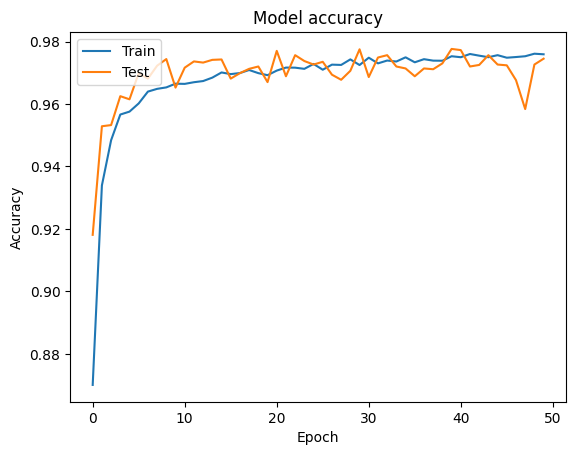

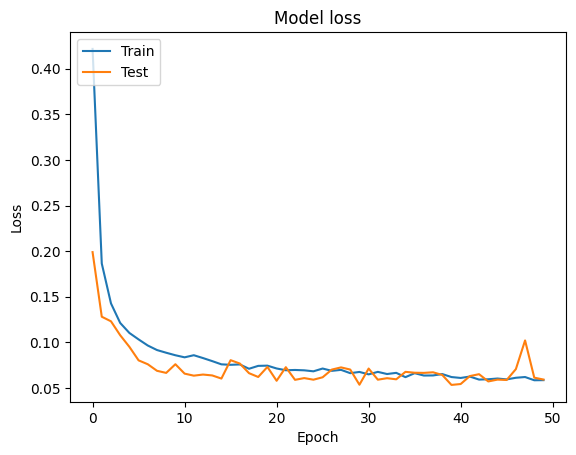

In [ ]:

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
num_classes = y_test.shape[1]


In [ ]:
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test.argmax(axis=1), classes=range(num_classes))


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


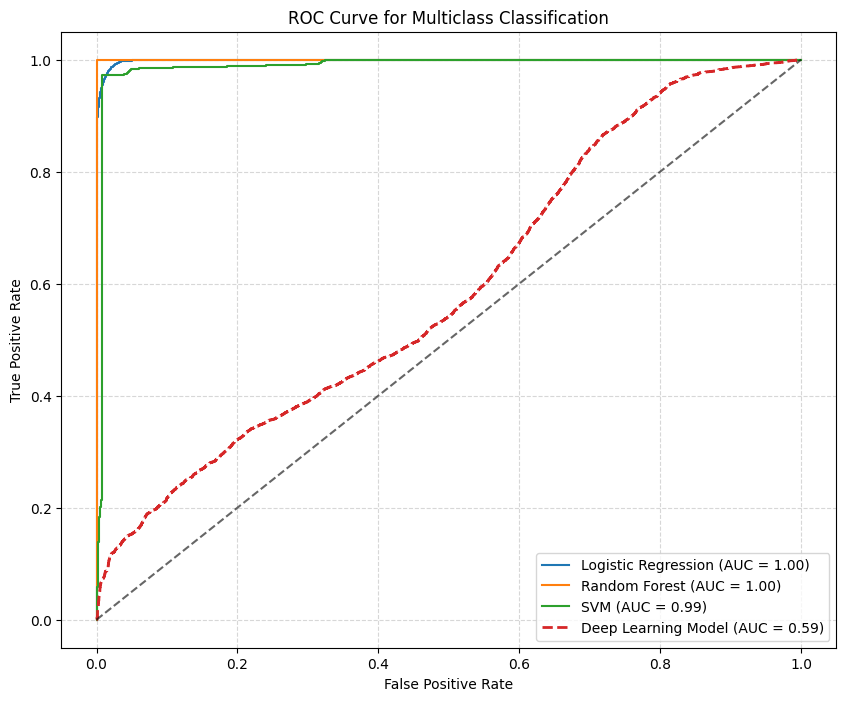

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

class_names = ["Normal", "Warning", "Critical", "Maintenance Required"]
num_classes = len(class_names)

y_test_bin = label_binarize(y_test.argmax(axis=1), classes=range(num_classes))

plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):
        y_pred_proba = model.decision_function(X_test)
    else:
        print(f"Skipping {name} (No probability scores available)")
        continue

    fpr, tpr, roc_auc = {}, {}, {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.plot(fpr["micro"], tpr["micro"], label=f"{name} (AUC = {roc_auc['micro']:.2f})")

y_pred_proba_dl = deep_model.predict(X_test)
fpr_dl, tpr_dl, roc_auc_dl = {}, {}, {}

for i in range(num_classes):
    fpr_dl[i], tpr_dl[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba_dl[:, i])
    roc_auc_dl[i] = auc(fpr_dl[i], tpr_dl[i])

fpr_dl["micro"], tpr_dl["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba_dl.ravel())
roc_auc_dl["micro"] = auc(fpr_dl["micro"], tpr_dl["micro"])

plt.plot(fpr_dl["micro"], tpr_dl["micro"], label=f"Deep Learning Model (AUC = {roc_auc_dl['micro']:.2f})", linestyle='--', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


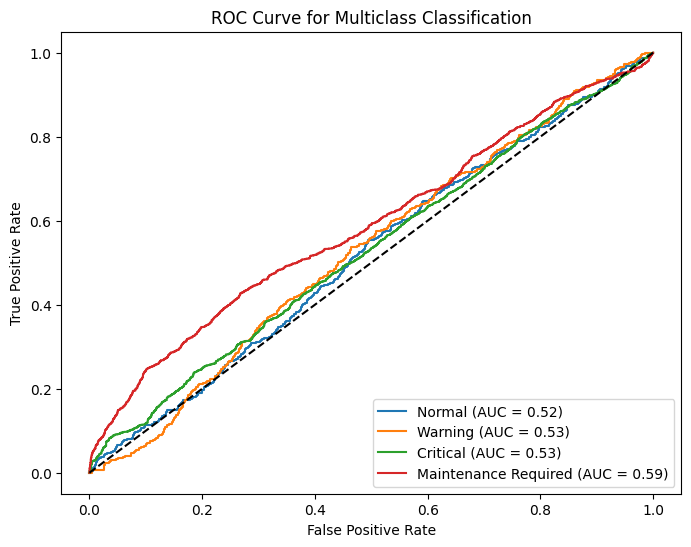

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

class_names = ["Normal", "Warning", "Critical", "Maintenance Required"]

y_pred_prob = deep_model.predict(X_test)

y_test_labels = np.argmax(y_test, axis=1)

y_test_binarized = label_binarize(y_test_labels, classes=np.arange(len(class_names)))

plt.figure(figsize=(8, 6))
for i, class_name in enumerate(class_names):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()


In [ ]:
deep_model.save('aviation.keras')

In [ ]:
# prompt: instal onnx

!pip install onnx
!pip install onnxruntime
!pip install skl2onnx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 12.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.2 which is incompatible.
t

In [ ]:
!pip install onnx tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.2
    Uninstalling protobuf-3.20.2:
      Successfully uninstalled protobuf-3.20.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
onnxconverter-common 1.14.0 requires protobuf==3.20.2, but you have protobuf 5.29.4 which is incompatible.


In [ ]:
!pip install onnx-tf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 21.4 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
# prompt: i want to save onnx file

import onnx
from onnx_tf.backend import prepare
import tensorflow as tf

# Load your Keras model
deep_model = tf.keras.models.load_model('aviation.keras')

# Convert the Keras model to ONNX format
onnx_model, _ = tf.keras.models.export_model(deep_model, 'aviation.onnx')

# Verify the ONNX model (optional)
onnx.checker.check_model(onnx_model)

print("ONNX model saved to aviation.onnx")


/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.18.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're u

ModuleNotFoundError: No module named 'keras.src.engine'

In [ ]:
!pip install scikit-learn onnx skl2onnx


  Using cached protobuf-3.20.2-py2.py3-none-any.whl.metadata (720 bytes)
Using cached protobuf-3.20.2-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.2 which is incompatible.
tensorflow-metadata 1.17.1 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.2 which is incompatible.
tensorflow 2.18.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.2 which is incompatible.


In [ ]:
import pickle

# Assuming svm_pipeline is your trained model
with open("svm_model.pkl", "wb") as f:
    pickle.dump(svm_pipeline, f)

print("✅ Model saved as 'svm_model.pkl'")



✅ Model saved as 'svm_model.pkl'


In [ ]:
X_train.columns

Index(['System', 'Component', 'Parameter', 'Value', 'Unit',
       'Action_Recommendation', 'Predicted_Failure_Days', 'Confidence_Score'],
      dtype='object')

In [ ]:
y

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import joblib

# Sample data for illustration
X = df_cleaned.drop(columns=['Status'])
y = df_cleaned['Status']  # Replace with your target data (Status)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
svm_pipeline = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Train the model
svm_pipeline.fit(X_train, y_train)

# Save the model
joblib.dump(svm_pipeline, 'model.pkl')


['model.pkl']

In [ ]:
categorical_cols = ['System', 'Component', 'Parameter', 'Action Recommendation', 'Unit']

# Label Encoding for categorical columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}

# Apply Label Encoding
for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

# Standard scaling for numerical columns
scaler = StandardScaler()
df[['Value', 'Predicted Failure Days', 'Confidence Score']] = scaler.fit_transform(
    df[['Value', 'Predicted Failure Days', 'Confidence Score']])

# Save the LabelEncoders and Scaler to a .pkl file
preprocessor_filename = '/mnt/data/preprocessor.pkl'

with open(preprocessor_filename, 'wb') as file:
    pickle.dump({
        'label_encoders': label_encoders,
        'scaler': scaler
    }, file)

preprocessor_filename

KeyError: 'Action Recommendation'

In [ ]:
X_train

,System,Component,Parameter,Value,Unit,Action_Recommendation,Predicted_Failure_Days,Confidence_Score
14307,6,14,2,-0.181946,15,5,-0.467561,1.008364
17812,0,15,3,-0.170733,1,5,-0.467561,0.824200
11020,2,17,6,0.139394,18,9,-0.467561,0.854894
15158,5,14,27,-0.155016,0,9,-0.467561,0.379139
24990,3,1,11,-0.174832,0,5,-0.467561,0.946976
...,...,...,...,...,...,...,...,...
6265,6,28,18,-0.047091,11,9,-0.467561,-0.035228
11284,5,37,20,-0.188998,9,4,2.324776,-1.769432
38158,6,0,8,-0.140850,0,5,-0.467561,1.039057
860,6,0,7,-0.159683,4,4,2.945295,-0.986738


In [ ]:
df['Status'].unique()

array(['Normal', 'Maintenance Required', 'Warning', 'Critical'],
      dtype=object)